### Coefficient of Variation

In [180]:
from scipy.stats import variation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Suppose we have a weighing machine to weigh cow, and data for the insturment is as follows:

In [3]:
weight  = np.array([280,295, 245, 310, 285, 270, 295, 300])

In [6]:
var = variation(weight)*100

In [9]:
print("Mean of the data: ", round(np.mean(weight),2))
print("Std of the data: ", round(np.std(weight),2))
print("Coffiecient of Variation for the instrument is :" , round(var,2))

Mean of the data:  285.0
Std of the data:  19.04
Coffiecient of Variation for the instrument is : 6.68


Suppose we have two repeated measurements of packed cell volume, as follows and we want to explore COV between these two datasets:

In [10]:
data_1 = np.array([33,31,23,25,29,26,28,29,30,31])
data_2 = np.array([35,36,29,28,27,28,31,32,26,25])

In [15]:
var_1 = variation(data_1)*100
var_2 = variation(data_2)*100

In [16]:
print("Coffiecient of Variation for data_1 is :" , round(var_1,2))
print("Coffiecient of Variation for data_2 is :" , round(var_2,2))



Coffiecient of Variation for data_1 is : 10.2
Coffiecient of Variation for data_2 is : 11.86


Now we will calculate COV between `data_1` and `data_2`

In [18]:
data = {"Data_1": data_1, "Data_2":data_2}
dataset = pd.DataFrame(data)

In [19]:
dataset.head()

,Data_1,Data_2
0,33,35
1,31,36
2,23,29
3,25,28
4,29,27


In [20]:
dataset["Mean"]= dataset.mean(axis=1)
dataset["Std"] = dataset.std(axis=1)
dataset["COV"] = dataset["Std"]/dataset["Mean"]*100

In [21]:
dataset.head()

,Data_1,Data_2,Mean,Std,COV
0,33,35,34.0,1.0,2.941176
1,31,36,33.5,2.5,7.462687
2,23,29,26.0,3.0,11.538462
3,25,28,26.5,1.5,5.660377
4,29,27,28.0,1.0,3.571429


In [27]:
print("COV between groups is : ", round(dataset.Mean.std()/dataset.Mean.mean(),2)*100)

COV between groups is :  10.0


### Pearson Correlation Coefficient

First we will try to find correlation coefficient between age and blood pressure of sample from India.

In [3]:
data = pd.read_csv("India.csv")

In [4]:
data.head()

,Country,Sex,Year,Age-standardised mean systolic blood pressure (mmHg),Age-standardised mean systolic blood pressure lower 95% uncertainty interval (mmHg),Age-standardised mean systolic blood pressure upper 95% uncertainty interval (mmHg),Age-standardised mean diastolic blood pressure (mmHg),Age-standardised mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Age-standardised mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Age-standardised prevalence of raised blood pressure,Age-standardised prevalence of raised blood pressure lower 95% uncertainty interval,Age-standardised prevalence of raised blood pressure upper 95% uncertainty interval,Crude prevalence of raised blood pressure,Crude prevalence of raised blood pressure lower 95% uncertainty interval,Crude prevalence of raised blood pressure upper 95% uncertainty interval,Number of adults with raised blood pressure,Number of adults with raised blood pressure lower 95% uncertainty interval,Number of adults with raised blood pressure upper 95% uncertainty interval
0,India,Men,1975,122.350379,114.041114,130.406286,78.007941,72.435968,83.795106,0.242063,0.140102,0.361623,0.205485,0.115452,0.315216,3.554521e+07,1.944980e+07,5.483609e+07
1,India,Men,1976,122.455017,114.618921,129.962311,78.057072,72.873279,83.382430,0.242517,0.145429,0.355080,0.205494,0.120293,0.308229,3.652564e+07,2.073441e+07,5.508953e+07
2,India,Men,1977,122.557283,115.219463,129.524269,78.103911,73.299619,83.091873,0.242985,0.151062,0.348327,0.205588,0.124489,0.301771,3.753863e+07,2.207958e+07,5.545092e+07
3,India,Men,1978,122.655957,115.878855,129.206492,78.148476,73.666794,82.785494,0.243477,0.156043,0.342532,0.205761,0.128542,0.295435,3.858531e+07,2.346635e+07,5.579576e+07
4,India,Men,1979,122.756322,116.518464,128.682056,78.193339,73.970279,82.465459,0.244013,0.160331,0.337049,0.206013,0.132655,0.290323,3.966980e+07,2.485945e+07,5.636873e+07


This dataset is huge but we will focus on only few aspects of it for our purpose. 

In [33]:
data["Year"].value_counts()

1975    2
1996    2
1998    2
1999    2
2000    2
2001    2
2002    2
2003    2
2004    2
2005    2
2006    2
2007    2
2008    2
2009    2
2010    2
2011    2
2012    2
2013    2
2014    2
1997    2
1995    2
1976    2
1994    2
1977    2
1978    2
1979    2
1980    2
1981    2
1982    2
1983    2
1984    2
1985    2
1986    2
1987    2
1988    2
1989    2
1990    2
1991    2
1992    2
1993    2
2015    2
Name: Year, dtype: int64

As we can clearly see this dataset is split into two parts one for men and other for women , so we will analyse how blood pressure level has changed for both genders one by one.

In [34]:
## For women
mask  = data["Sex"]=="Women"


Now we will find the correlation between year and blood pressure.

In [35]:
p = data.columns[3]

In [36]:
p

'Age-standardised mean systolic blood pressure (mmHg)'

In [37]:
correlation_for_women = data[mask]["Year"].corr(data[mask][p])

In [39]:
print("Coorelation between Women blood pressure and year is  ", round(correlation_for_women,5))

Coorelation between Women blood pressure and year is   0.98597


Now performing same analysis for Men

In [40]:
mask_1 = data["Sex"]=="Men"
correlation_for_Men = data[mask_1]["Year"].corr(data[mask_1][p])
print("Coorelation between Men blood pressure and year is  ", round(correlation_for_Men,5))

Coorelation between Men blood pressure and year is   0.99392


This implies Men blood pressure has little higher correlation comapred to Women.

#### Breast cancer data [Refrence](https://data.world/deviramanan2016/nki-breast-cancer-data/workspace/project-summary?agentid=deviramanan2016&datasetid=nki-breast-cancer-data)

272 breast cancer patients (as rows), 1570 columns.
Network built using only gene expression.
Meta data includes patient info, treatment, and survival.

Each node is a group of patients similar to each other. Flares (left) represent sub-populations that are distinct from the larger population. (One differentiating factor between the two flares is estrogen expression (low = top flare, high = bottom flare)). Bottom flare is a group of patients with 100% survival. Top flare shows a range of survival – very poor towards the tip (red), and very good near the base (circled).

The circled group of good survivors have genetic indicators of poor survivors (i.e. low ESR1 levels, which is typically the prognostic indicator of poor outcomes in breast cancer) – understanding this group could be critical for helping improve mortality rates for this disease. Why this group survived was quickly analysed by using the Outcome Column (here Event Death - which is binary - 0,1) as a Data Lens (which we term Supervised vs Unsupervised analyses).

In [7]:
b_data = pd.read_csv("NKI_cleaned.csv")

In [8]:
b_data.head()

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160


We will find person correlation between age and survival:

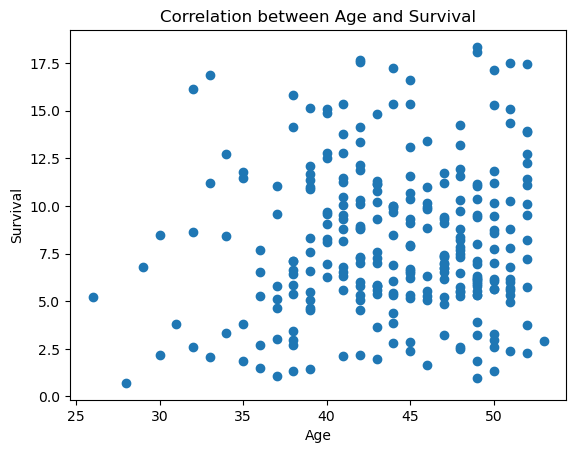

In [14]:
# hist plot
plt.scatter(b_data.age,b_data.survival)
plt.xlabel("Age")
plt.ylabel("Survival")
plt.title("Correlation between Age and Survival");

From the above graph, these two don't show a good correlation. let's compute it for verification

In [15]:
corr = b_data["age"].corr(b_data["survival"])
print(corr)

0.0769661672963595


### Spearman Correlation Coefficient on Linnerud Dataset:[ Refrence ](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset)
The Linnerud dataset is a multi-output regression dataset. It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club:

physiological - CSV containing 20 observations on 3 physiological variables:
Weight, Waist and Pulse.

exercise - CSV containing 20 observations on 3 exercise variables:
Chins, Situps and Jumps.

In [25]:
from sklearn.datasets import load_linnerud

In [29]:
d=load_linnerud()

dat = pd.DataFrame(d.data,columns=d.feature_names)
alldat=dat.join(pd.DataFrame(d.target,columns=d.target_names) )
alldat.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [32]:
correlation_matrix = alldat.corr(method='spearman')

In [34]:
correlation_matrix

,Chins,Situps,Jumps,Weight,Waist,Pulse
Chins,1.000000,0.656203,0.322631,-0.380198,-0.541897,0.136623
Situps,0.656203,1.000000,0.695210,-0.577736,-0.724732,0.179236
Jumps,0.322631,0.695210,1.000000,-0.199020,-0.199399,0.098411
Weight,-0.380198,-0.577736,-0.199020,1.000000,0.814233,-0.370696
Waist,-0.541897,-0.724732,-0.199399,0.814233,1.000000,-0.237697
Pulse,0.136623,0.179236,0.098411,-0.370696,-0.237697,1.000000


From the above table it is clear that, we have good `spearman` correlation between `Weight` and `Pulse` , `Waist` and `Pulse` comapred to other features.

<AxesSubplot:>

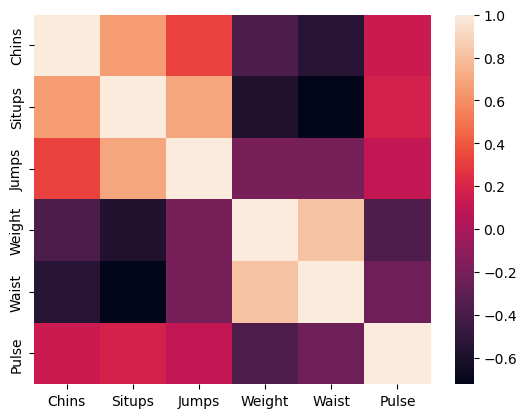

In [35]:
sns.heatmap(correlation_matrix)

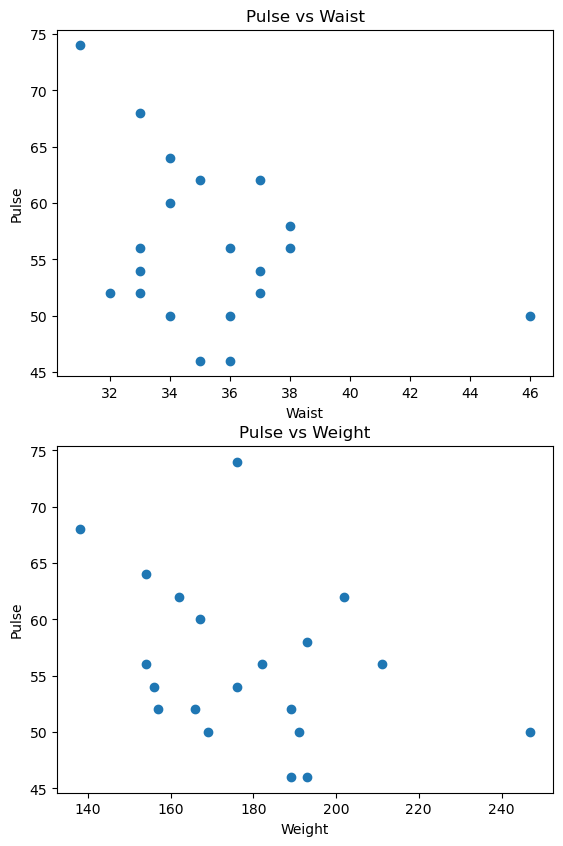

In [48]:
fig,ax = plt.subplots(nrows= 2, ncols= 1)
ax[0].scatter(alldat['Waist'], alldat['Pulse'])
ax[0].set_title("Pulse vs Waist")
ax[0].set_xlabel("Waist")
ax[0].set_ylabel("Pulse")
ax[1].scatter(alldat['Weight'], alldat['Pulse'])
ax[1].set_title("Pulse vs Weight")
ax[1].set_xlabel("Weight")
ax[1].set_ylabel("Pulse")
plt.subplots_adjust(top=1.7)
plt.show();

### Spearman Correlation Coefficient on Diabetes Dataset:[ Refrence ](https://scikit-learn.org/stable/datasets/toy_dataset.html#Diabetes-dataset)

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [56]:
from sklearn.datasets import load_diabetes
d=load_diabetes()

dat = pd.DataFrame(d.data,columns=d.feature_names)
alldat=dat.join(pd.DataFrame(d.target,columns=["Target"]) )
alldat.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [58]:
correlation_matrix = alldat.corr(method='spearman')
correlation_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
sex,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
bmi,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
bp,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
s1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
s2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
s3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
s4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
s5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
s6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


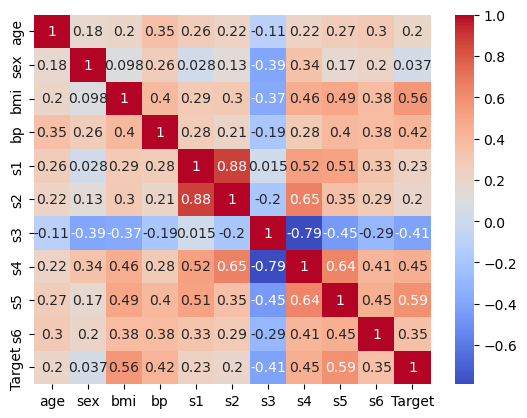

In [61]:
sns.heatmap(correlation_matrix, annot= True, cmap ='coolwarm' );

From the above graph it is very clear that `Target` value has good correlation with `bmi`, `bp`, `s3` , `s4`, and `s5` 

### Spearman Correlation Coefficient on Diabetes Dataset [ Refrence ](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset)


In [65]:
from sklearn.datasets import load_breast_cancer
d=load_breast_cancer()

dat = pd.DataFrame(d.data,columns=d.feature_names)
alldat=dat.join(pd.DataFrame(d.target, columns = ["Target"]) )
alldat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [70]:
len(alldat.columns)

31

We have total 31 features and that's why we will see which are closely related to each other and with the target.

In [75]:
corr_matrix = alldat.corr(method = 'spearman')

In [82]:
corr_matrix.shape

(31, 31)

As we can see this matrix is very large so we will make function which can extract the all the pairs having correlation greather than some particular value.

In [156]:
def corr_matrix_extractor(data):
    dict = {}
    for i in range(len(data)):
        for j in range(i,len(data)):
            if(data.iloc[i,j]>0.90 or data.iloc[i,j]<-0.90):
                value = data.iloc[i,j]
                index = data.where(data == value).stack()
                
                dict[str(index.index[0])]= index[0]
    return dict            


In [157]:
len(corr_matrix_extractor(corr_matrix))

27

In [158]:
corr_matrix_extractor(corr_matrix)

{"('mean radius', 'mean radius')": 1.0,
 "('mean radius', 'mean perimeter')": 0.9978017394617467,
 "('mean radius', 'mean area')": 0.9996020278067482,
 "('mean radius', 'worst radius')": 0.9786044231727475,
 "('mean radius', 'worst perimeter')": 0.9715554621458756,
 "('mean radius', 'worst area')": 0.9788626109712246,
 "('mean texture', 'worst texture')": 0.90921828717628,
 "('mean perimeter', 'mean area')": 0.9970682695182412,
 "('mean perimeter', 'worst radius')": 0.9812439435131224,
 "('mean perimeter', 'worst perimeter')": 0.9789795898360197,
 "('mean perimeter', 'worst area')": 0.9808639170880955,
 "('mean area', 'worst radius')": 0.9792583545167753,
 "('mean area', 'worst perimeter')": 0.9718219702456465,
 "('mean area', 'worst area')": 0.9802638561116057,
 "('mean compactness', 'worst compactness')": 0.9010286712785714,
 "('mean concavity', 'mean concave points')": 0.9273523947193674,
 "('mean concavity', 'worst concavity')": 0.9385434819837921,
 "('mean concavity', 'worst conca

All the above parameters have `spearman` coffiecient larger than 0.90.

### Paired t-test

First we will analyse the temperature data of people during winter and summer and see if there is any statistical difference between the two datasets.

In [176]:
temp_winter = np.random.randint(low = 35, high = 45, size = 50)
temp_summer = np.random.randint(low = 30, high = 40, size = 50)

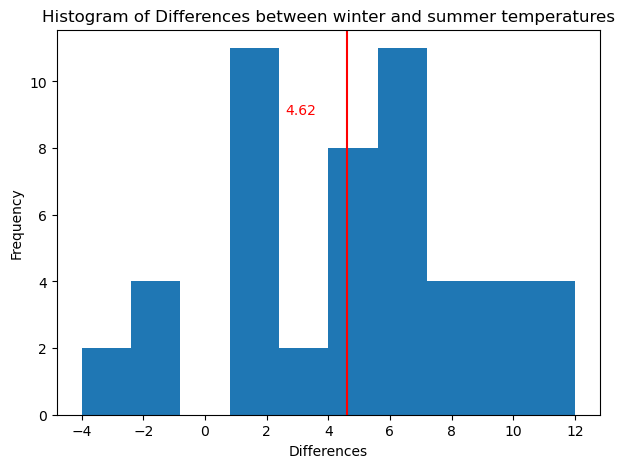

In [179]:
difference = temp_winter- temp_summer

# Inspect difference data 
# Histogram +  Mean
fig = plt.figure(figsize=(7,5))   
plt.hist(difference, bins=10) 
plt.axvline(x=np.mean(difference), c ='r')
plt.text(np.mean(difference)-2, 9, round(np.mean(difference),3), c='r')
plt.title('Histogram of Differences between winter and summer temperatures')
plt.xlabel("Differences")
plt.ylabel("Frequency")
plt.show()

In [181]:
# Paired two-sample t-test
result = stats.ttest_rel(temp_winter, temp_summer)

# p-value
print(result.pvalue)

5.35966002501288e-11


As we can see the `p-value ` is quite smaller than 0.05 i.e. the winter temperature and summer temperature is statistically different , which is obvious from the mean value also which is not zero.

#### paired t-test on ML classifiers[ Refrence ](https://towardsdatascience.com/paired-t-test-to-evaluate-machine-learning-classifiers-1f395a6c93fa)
Here, we need to determine whether there is a statistically significant difference between two classifiers such that we can actually use only the best one.
We will perform this method for Linnerud datset described above.

In [182]:
from sklearn.datasets import load_linnerud

d=load_linnerud()

dat = pd.DataFrame(d.data,columns=d.feature_names)
alldat=dat.join(pd.DataFrame(d.target,columns=d.target_names) )
alldat.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


x, y = 
lr = LogisticRegression(max_iter=150)
dt = DecisionTreeClassifier(max_depth = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)

s1 = lr.score(x_test, y_test)
s2 = dt.score(x_test, y_test)

print('Model A accuracy: %.2f%%' % (s1*100))
print('Model B accuracy: %.2f%%' % (s2*100))

alldat[[""]]